# Student Exam Performance

### **Goal**

The goal of this analysis is to determine the correlation between a student's test scores and their socio-economic status. The factors we're going to be looking at are:
 
 1. **Gender** *Categorical/Nominal* - Gender of student (M/F)
 2. **Race/ethnicity** *Categorical/Nominal* - Race and/or ethnicity of the student. This category is labeled Group A, Group B, etc..
 3. **Parent's level of education** *Categorical/Ordinal* - The level of formal education acheived by the student's parents (high school, bachelor's, master's, etc..)
 4. **Lunch plan** *Categorical/Nominal* - The lunch plan the student was on (standard or free/reduced).
 5. **Completion of test prep course** *Categorical/Ordinal* - Whether or not the student completed the test prep course

We will analyze the correlation between that quantitative data and the following test scores:

 1. **Math Score** *Numeric/Discrete* - Result of student's math exam.
 2. **Reading Score** *Numeric/Discrete* - Result of student's reading exam.
 3. **Writing Score** *Numeric/Discrete* - Result of student's writing exam.

 [Data Source](https://www.kaggle.com/spscientist/students-performance-in-exams)

# Import the data and get an idea of what it contains

Explore the various metadata variables to get a better picture of the kind of data we're dealing with and ensure the data is complete and makes sense.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import data
student_performance = pd.read_csv("https://raw.githubusercontent.com/thesabermaniac/StudentExamScores/main/StudentsPerformance.csv")

student_performance_copy = student_performance.copy()

#get shape of data
print("shape: " + str(student_performance.shape))

#show snapshot of data
student_performance.head()

shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Make sure there's no missing/corrupted data

In [2]:
# check for null values
student_performance.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
# check for unique values
student_performance.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [4]:
# check data types
student_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# Amend the data

Add columns to the data to make it usable for a linear regression

In [5]:
# add column for mean test scores

student_performance['mean_test_scores'] = student_performance[['math score', 'reading score', 'writing score']].mean(axis=1)

student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_test_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Convert strings to categories

Now we convert the categorical data from strings to panda's Categorical data type so we can create a numerical representation of the data that we can use in our regression

In [6]:
# convert categorical data from string to category dtype
student_performance['gender'] = pd.Categorical(student_performance['gender'])
student_performance['race/ethnicity'] = pd.Categorical(student_performance['race/ethnicity'])
student_performance['parental level of education'] = pd.Categorical(student_performance['parental level of education'])
student_performance['lunch'] = pd.Categorical(student_performance['lunch'])
student_performance['test preparation course'] = pd.Categorical(student_performance['test preparation course'])

# reorder education level and test prep categories to reflect ordinal data
student_performance['parental level of education'].cat.reorder_categories(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], inplace=True)
student_performance['test preparation course'].cat.reorder_categories(['none', 'completed'], inplace=True)

student_performance.dtypes


gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
mean_test_scores                float64
dtype: object

In [7]:
# add numeric representation of categorical data

# convert categorical columns to numeric
student_performance['genderInt'] = student_performance['gender'].cat.codes
student_performance['lunchInt'] = student_performance['lunch'].cat.codes
student_performance['prepInt'] = student_performance['test preparation course'].cat.codes
student_performance['educationInt'] = student_performance['parental level of education'].cat.codes
student_performance['raceInt'] = student_performance['race/ethnicity'].cat.codes

student_performance.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_test_scores,genderInt,lunchInt,prepInt,educationInt,raceInt
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,1,0,4,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,1,1,2,2
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,1,0,5,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,0,0,3,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,1,0,2,2
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,0,1,0,3,1
6,female,group B,some college,standard,completed,88,95,92,91.666667,0,1,1,2,1
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,1,0,0,2,1
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,1,0,1,1,3
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,0,0,0,1,1


# Plot the numerical data 

Plot each of the test scores to get an idea of the type of distribution we're dealing with

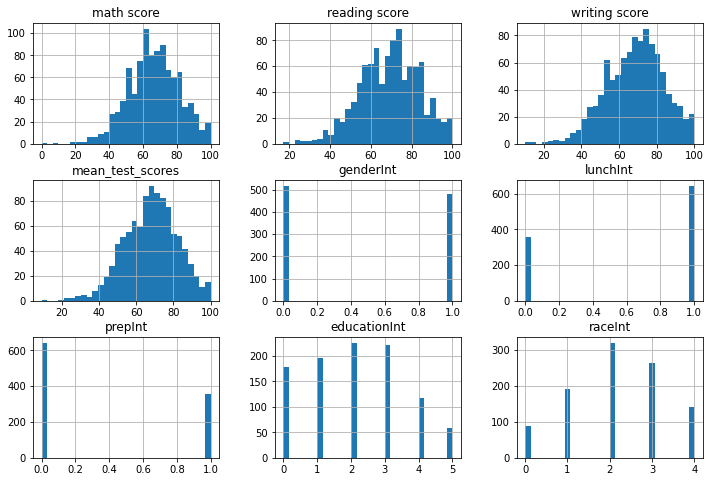

In [8]:
numerical_data = student_performance.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
numerical_data.hist(bins=30, figsize=(12, 8))
plt.show()


**Takeaways**

- It looks like the test scores have a normal distribution with a slight left skew
- All the test results seem to have a spike between 50 and 60
- It looks like around twice as many students are on the standard lunch plan than the free/reduced plan
- It looks like around twice as many students didn't take the test preparation course than the ones that completed it

# Correlation Matrix

Let's take a look at the relationship between the data to see if anything sticks out as highly correlated

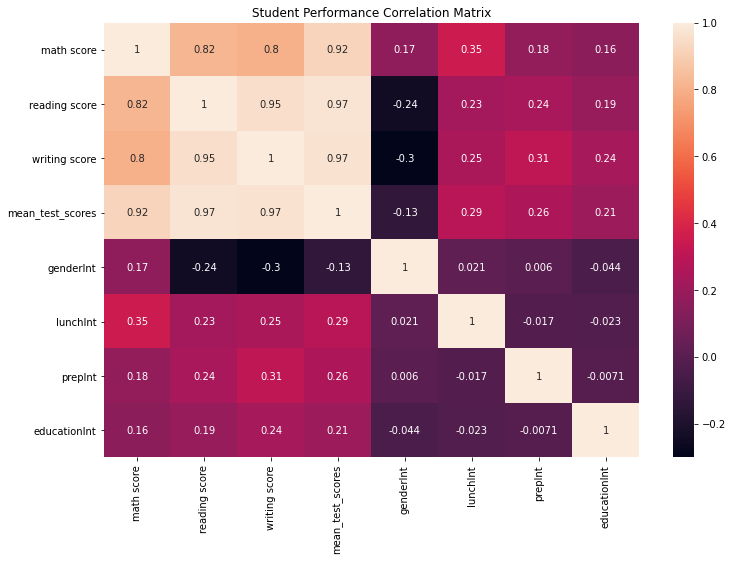

In [24]:
corr_matrix = student_performance.corr()
plt.figure(figsize=(12, 8))
plt.title("Student Performance Correlation Matrix")
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Takeaways**

- As you'd expect, there's a high correlation between the 3 test results. This is makes sense, as if you do well on one test, you're likely to do well on the others.
- There doesn't seem to be strong correlation between any of the categorical data and the test results.
- That being said, it seems like female students tend to do better on the reading and writing, while male students perform better on the math section
- While still relatively low, it seems like the highest correlation among the categorical data is from the lunch plan. Students that are on the standard lunch plan tend to have higher test scores.
- Completion of the test prep course also seems to have a low-medium degree of correaltion, as does education level of the parents.
- We can't glean anything from the race/ethnicity data since it's not a true/false value and it's not ordinal

# Drop Race/Ethnicity Column

This column is not true/false or ordinal so we can't do anything meaningful with it in a regression

In [10]:
student_performance.drop(['race/ethnicity', 'raceInt'], axis=1, inplace=True)
student_performance.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_test_scores,genderInt,lunchInt,prepInt,educationInt
0,female,bachelor's degree,standard,none,72,72,74,72.666667,0,1,0,4
1,female,some college,standard,completed,69,90,88,82.333333,0,1,1,2
2,female,master's degree,standard,none,90,95,93,92.666667,0,1,0,5
3,male,associate's degree,free/reduced,none,47,57,44,49.333333,1,0,0,3
4,male,some college,standard,none,76,78,75,76.333333,1,1,0,2


# Scaling

Scale the data to make it even with each other

In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

student_performance_numeric = student_performance.copy()
student_performance_numeric.drop(['gender', 'parental level of education', 'lunch', 'test preparation course'], axis=1, inplace=True)

x_scaled = min_max_scaler.fit_transform(student_performance_numeric)

student_performance_scaled = pd.DataFrame(x_scaled)
student_performance_scaled.columns = ['math score', 'reading score', 'writing score', 'mean_test_scores', 'genderInt', 'lunchInt', 'prepInt', 'educationInt']

student_performance_scaled.head()

,math score,reading score,writing score,mean_test_scores,genderInt,lunchInt,prepInt,educationInt
0,0.72,0.662651,0.711111,0.699634,0.0,1.0,0.0,0.8
1,0.69,0.879518,0.866667,0.805861,0.0,1.0,1.0,0.4
2,0.90,0.939759,0.922222,0.919414,0.0,1.0,0.0,1.0
3,0.47,0.481928,0.377778,0.443223,1.0,0.0,0.0,0.6
4,0.76,0.734940,0.722222,0.739927,1.0,1.0,0.0,0.4


# Create Linear Models

Now, we make a linear regression model using scikitlearn based on the relevant categorical data (gender, lunch, prep, and education)

In [12]:
from sklearn.linear_model import LinearRegression

# model to test the mean test score
mean = student_performance_scaled['mean_test_scores'].copy()
x = student_performance_scaled.drop(['math score', 'writing score', 'reading score', 'mean_test_scores'], axis=1)

mean_lin_reg = LinearRegression().fit(x, mean)
mean_r_sq = mean_lin_reg.score(x, mean)

print("Mean model r^2: " + str(mean_r_sq))


Mean model r^2: 0.21544904862664838


In [13]:
# model to test just the math scores
math = student_performance_scaled['math score'].copy()

math_lin_reg = LinearRegression().fit(x, math)
math_r_sq = math_lin_reg.score(x, math)

print("Math model r^2: " + str(math_r_sq))


Math model r^2: 0.21327111071982918


In [14]:
# model to test just the reading scores
reading = student_performance_scaled['reading score'].copy()

reading_lin_reg = LinearRegression().fit(x, reading)
reading_r_sq = reading_lin_reg.score(x, reading)

print("Reading model r^2: " + str(reading_r_sq))


Reading model r^2: 0.21114348625518597


In [15]:
# model to test just the writing scores
writing = student_performance_scaled['writing score'].copy()

writing_lin_reg = LinearRegression().fit(x, writing)
writing_r_sq = writing_lin_reg.score(x, writing)

print("Writing model r^2: " + str(writing_r_sq))

Writing model r^2: 0.3099225317138439


# Create OLS Models

The Linear Regression output subpar r^2 values, so we're going to try using an OLS model to see if we can get a better model.

In [27]:
# OLS model to test the mean scores
import statsmodels.api as sm

model = sm.OLS(mean, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       mean_test_scores   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              1547.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:21:11   Log-Likelihood:                         -22.332
No. Observations:                1000   AIC:                                      52.66
Df Residuals:                     996   BIC:                                      72.30
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [17]:
# OLS model to test just the math scores
import statsmodels.api as sm

math_model = sm.OLS(math, x)
math_results = math_model.fit()
print(math_results.summary())

                                 OLS Regression Results                                
Dep. Variable:             math score   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              1757.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:10:37   Log-Likelihood:                          12.794
No. Observations:                1000   AIC:                                     -17.59
Df Residuals:                     996   BIC:                                      2.043
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [18]:
# OLS model to test just the reading scores
import statsmodels.api as sm

reading_model = sm.OLS(reading, x)
reading_results = reading_model.fit()
print(reading_results.summary())

                                 OLS Regression Results                                
Dep. Variable:          reading score   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1318.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:10:37   Log-Likelihood:                         -72.624
No. Observations:                1000   AIC:                                      153.2
Df Residuals:                     996   BIC:                                      172.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [19]:
# OLS model to test just the writing scores
import statsmodels.api as sm

writing_model = sm.OLS(writing, x)
writing_results = writing_model.fit()
print(writing_results.summary())

                                 OLS Regression Results                                
Dep. Variable:          writing score   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              1485.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:10:37   Log-Likelihood:                         -43.127
No. Observations:                1000   AIC:                                      94.25
Df Residuals:                     996   BIC:                                      113.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Predictions

Now, we can take a new set of data containing the student's socioeconomic data and use our model to predict the his/her test results

In [20]:
import random

new_data = np.random.randint(2, size=(10, 3))
rand_nums = [random.randint(0,5)/5 for i in range(10)]
new_data = np.append(new_data, [[i] for i in rand_nums ], axis=1)
print("New data:")
print(new_data)

# mean score prediction
new_mean = mean_lin_reg.predict(new_data)
print("Predictions:")
print(new_mean)

New data:
[[1.  1.  0.  0.4]
 [0.  0.  1.  0.6]
 [1.  0.  0.  0.2]
 [1.  0.  0.  0. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  0. ]
 [0.  0.  0.  0.6]
 [0.  0.  0.  0.6]
 [1.  0.  1.  0. ]
 [0.  1.  0.  0.2]]
Predictions:
[0.62717599 0.67763668 0.50585691 0.48343397 0.78072213 0.66860745
 0.59135935 0.59135935 0.5697113  0.64540962]


In [21]:
# math score prediction
new_math = math_lin_reg.predict(new_data)
print(new_math)

[0.7046913  0.61821042 0.57409095 0.55578194 0.81778494 0.72623993
 0.56004379 0.56004379 0.61394858 0.63571713]


In [22]:
# reading score prediction
new_reading = reading_lin_reg.predict(new_data)
print(new_reading)

[0.58154845 0.69138161 0.46952714 0.44692002 0.74058893 0.62755335
 0.60016248 0.60016248 0.53813916 0.64436243]


In [23]:
# writing score prediction
new_writing = writing_lin_reg.predict(new_data)
print(new_writing)

[0.58312659 0.73098998 0.46354542 0.4367213  0.77655295 0.64243236
 0.61803598 0.61803598 0.54967531 0.65714479]
